# CNN for Fruit Classification
### The first Deep learning project that I did from scratch
### Dataset: Fruits 360

In [54]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as tt
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Look into the data directory
data_dir = '../input/fruits/fruits-360'
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/Training")
print(classes)

['Test', 'test-multiple_fruits', 'readme.md', 'papers', 'Training', 'LICENSE']
['Papaya', 'Watermelon', 'Onion White', 'Apple Granny Smith', 'Kiwi', 'Kaki', 'Tomato 4', 'Strawberry', 'Carambula', 'Strawberry Wedge', 'Tomato Maroon', 'Apple Red 1', 'Potato Red Washed', 'Lychee', 'Peach 2', 'Pear Red', 'Plum 2', 'Dates', 'Banana', 'Corn Husk', 'Tomato Cherry Red', 'Huckleberry', 'Avocado', 'Cauliflower', 'Apricot', 'Tomato Heart', 'Potato Sweet', 'Pomegranate', 'Pepper Red', 'Cocos', 'Onion Red', 'Tomato 1', 'Walnut', 'Apple Red 3', 'Potato Red', 'Pear Monster', 'Tomato 3', 'Nut Forest', 'Mango Red', 'Pear', 'Ginger Root', 'Apple Crimson Snow', 'Cherry 1', 'Pear Abate', 'Pepper Yellow', 'Pepper Green', 'Avocado ripe', 'Grapefruit White', 'Apple Golden 3', 'Apple Red Yellow 2', 'Cherry Rainier', 'Hazelnut', 'Apple Braeburn', 'Corn', 'Peach Flat', 'Limes', 'Banana Lady Finger', 'Clementine', 'Apple Golden 1', 'Cherry 2', 'Pineapple Mini', 'Tomato not Ripened', 'Grape White 2', 'Rambutan', 

### What type of data is it? 
### The data is of image type.

### What type of problem is it? 
### This is a classification problem. We need to classify images based on their images into 131 different classes. 

In [4]:
project_name='Course_Project_Fruits_3_cnn'

In [4]:
dataset = ImageFolder(data_dir+'/Training', transform=ToTensor())

In [5]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [6]:
print(dataset.classes)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [7]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


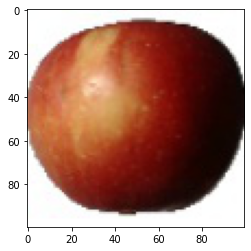

In [8]:
show_example(*dataset[0])

Label:  Apple Golden 1 (2)


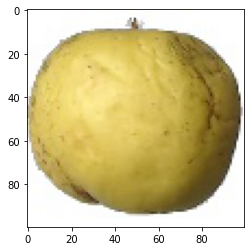

In [9]:
show_example(*dataset[1099])

Label:  Cantaloupe 1 (22)


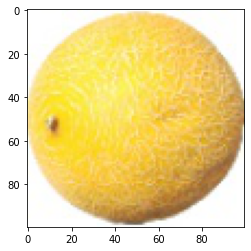

In [10]:
show_example(*dataset[10909]) 

In [1]:
!pip install jovian --upgrade -q

In [2]:
import jovian

<IPython.core.display.Javascript object>

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>

In [14]:
random_seed = 42
torch.manual_seed(random_seed);

In [15]:
from torch.utils.data import random_split

In [16]:
val_size = 7692
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(60000, 7692)

In [17]:
batch_size=32

In [18]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [19]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

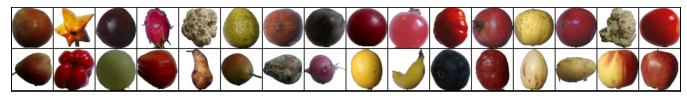

In [20]:
show_batch(train_dl)

In [21]:
jovian.commit(project=project_name, environment=None)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>

In [22]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [23]:
class Fruit360CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 100, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(100, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(128, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 12 x 12

            nn.Flatten(), 
            nn.Linear(256 * 12 * 12, 5120),
            nn.ReLU(),
            nn.Linear(5120, 1024),
            nn.ReLU(),
            nn.Linear(1024, 131))
        
    def forward(self, xb):
        return self.network(xb)

In [24]:
model = Fruit360CnnModel()
model

Fruit360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(100, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(128, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(192, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=36864, out_features=5120, bias=True)
    (17): ReLU()
    (18): Linear(in_features=5120, out_fe

In [25]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 100, 100])
out.shape: torch.Size([32, 131])
out[0]: tensor([ 2.6504e-02, -2.5358e-02, -2.6618e-02, -4.5757e-03,  1.8589e-02,
        -1.1725e-03, -2.9367e-02, -1.8512e-02,  2.3280e-02, -2.0058e-02,
        -2.3150e-02,  1.4347e-02, -1.8820e-02, -1.2889e-02,  9.4369e-03,
        -8.4263e-03,  4.5131e-03, -3.0556e-02, -2.8831e-02, -2.3924e-02,
        -3.7494e-03, -1.0403e-02,  2.8447e-02, -3.0489e-02, -9.8087e-03,
        -3.5094e-03, -2.5906e-02,  8.9225e-03,  6.3942e-03,  2.5645e-02,
        -7.3545e-04,  1.2753e-02,  4.3580e-03, -1.0778e-02, -6.9155e-03,
        -7.4299e-03, -3.2749e-02,  3.3750e-03,  3.1342e-02,  1.6905e-02,
         1.4018e-02, -3.0855e-02, -1.4320e-02,  6.5805e-03, -3.4850e-05,
        -2.2650e-02,  1.3647e-02,  1.7449e-02,  1.6530e-02, -5.7867e-03,
         6.1781e-03, -1.3348e-02,  3.7763e-03, -1.9114e-02,  8.2360e-03,
        -1.8084e-03, -2.7570e-02,  1.5241e-03,  4.9014e-03,  2.0288e-02,
         1.2253e-02, -8.7968e-03, -2.10

In [26]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [27]:
device = get_default_device()
device

device(type='cuda')

In [28]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [29]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>

In [30]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [31]:
model = to_device(Fruit360CnnModel(), device)

In [32]:
evaluate(model, val_dl)

{'val_loss': 4.875814914703369, 'val_acc': 0.010115358047187328}

In [33]:
num_epochs = 6
opt_func = torch.optim.Adam
lr = 0.001

In [34]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.2083, val_loss: 0.2080, val_acc: 0.9341
Epoch [1], train_loss: 0.1220, val_loss: 0.1235, val_acc: 0.9662
Epoch [2], train_loss: 0.0614, val_loss: 0.0533, val_acc: 0.9833
Epoch [3], train_loss: 0.0485, val_loss: 0.0184, val_acc: 0.9947
Epoch [4], train_loss: 0.0382, val_loss: 0.0159, val_acc: 0.9947
Epoch [5], train_loss: 0.0363, val_loss: 0.0452, val_acc: 0.9889


In [35]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

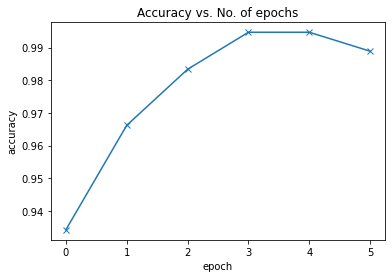

In [37]:
plot_accuracies(history)

In [38]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

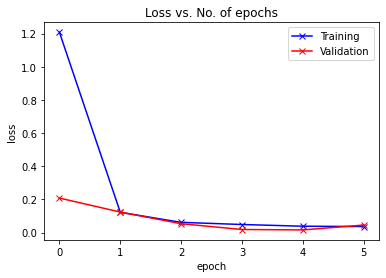

In [39]:
plot_losses(history)

In [40]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>

In [41]:
test_ds = ImageFolder(data_dir+'/Test', transform=ToTensor())

In [42]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Apple Braeburn , Predicted: Apple Braeburn


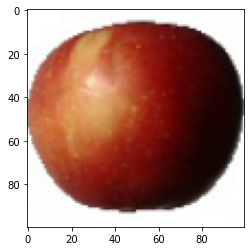

In [44]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Pink Lady , Predicted: Apple Pink Lady


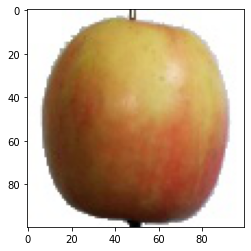

In [45]:
img, label = test_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Braeburn , Predicted: Apple Red 2


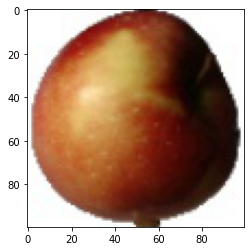

In [46]:
img, label = test_ds[153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Fig , Predicted: Fig


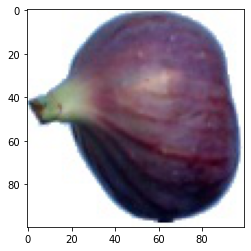

In [47]:
img, label = test_ds[7053]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [49]:
test_loader = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.7845014333724976, 'val_acc': 0.8540052771568298}

In [50]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


In [52]:
torch.save(model.state_dict(), 'Fruit360CnnModel.pth')

In [53]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>

## Final accuracy: 85%
## Final loss: 0.7845

## Regarding the future plan and its use case:
### This type of models can be used in grocery stores to classify different type of fruit in their stock and help order the one which will be/is out of stock.
### I am thing on using different deep learning algorithm to improve its accuracy and work on other projects. I think my next project would be to creat a chat bot.

## This was a really great project to do and it tought me many things:)

### This was a really fun project to complete and it taught me a lot. One of the most important thing that it taught me was how to consume less RAM while training. My kernel would always run out of RAM. I learned how to consume less RAM by tweaking the channel size, resizing the input images(Although I did not apply in this project) and other hyperparameters.

### I have shared my blog on LinkedIn too:)

In [6]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/aaryanreegmi39/Course_Project_Fruits_3_cnn


<IPython.core.display.Javascript object>